# LDA Clustering

## 1. Imports

In [33]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/whatsupaleks/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 2. Load data

In [2]:
document_df = pd.read_json("../../data/preprocessed/translated_results.json")

In [3]:
document_df.head()

,Content,original_language,Content_in_de
0,ARIVE | Your favorite brandsGet the appOur Vis...,en,ANKOMMEN | Ihre LieblingsmarkenHolen Sie sich ...
1,Rückabwicklung - von Lebensversicherungen Wir ...,de,Rückabwicklung - von Lebensversicherungen Wir ...
2,Starke Versicherungen für deinen Lifestyle ...,de,Starke Versicherungen für deinen Lifestyle ...
3,RESTUBE - the airbag for more freedom and sa...,en,RESTUBE - the airbag for more freedom and safe...
4,CureVac - Wir revolutionieren die mRNA für das...,de,CureVac - Wir revolutionieren die mRNA für das...


In [5]:
document_df = document_df["Content_in_de"]
document_df.head()

0    ANKOMMEN | Ihre LieblingsmarkenHolen Sie sich ...
1    Rückabwicklung - von Lebensversicherungen Wir ...
2       Starke Versicherungen für deinen Lifestyle ...
3    RESTUBE - the airbag for more freedom and safe...
4    CureVac - Wir revolutionieren die mRNA für das...
Name: Content_in_de, dtype: object

## 3. Clean Data

In [13]:
import sys
sys.path.insert(0, '../../src/02 Data Preprocessing')
from Preprocessing import preprocess_data



In [14]:
document_df = preprocess_data(document_df)

In [15]:
document_df.head()

0    ankomm lieblingsmarkenhol appuns visionpartner...
1    ruckabwickl lebensversicher hol doppelt leb re...
2    stark versicher lifestyl held de hom produkt a...
3    restub the airbag for mor freedom and safety t...
4    curevac revolutioni mrna leb mensch fuhrungste...
Name: Content_in_de, dtype: object

## 4. Vectorize webpage texts

In [16]:
corpus = []
not_scraped = []
for index, row in document_df.items():
  if row == np.nan:
    corpus.append("Null")
    not_scraped.append(index)
  else:
    corpus.append(row)

In [17]:
print(not_scraped)

[]


In [18]:
count_vect = CountVectorizer(stop_words=stopwords.words('german'))
x_counts = count_vect.fit_transform(corpus)
x_counts.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [19]:
tfidf_transformer = TfidfTransformer()
x_tfidf = tfidf_transformer.fit_transform(x_counts)

## 5. Apply LDA Clustering

In [37]:
dimension = 24
lda = LDA(n_components = dimension)
lda_array = lda.fit_transform(x_tfidf)
lda_array

array([[0.67853129, 0.0139769 , 0.0139769 , ..., 0.0139769 , 0.0139769 ,
        0.0139769 ],
       [0.00303284, 0.00303284, 0.00303285, ..., 0.00303284, 0.00303284,
        0.00303284],
       [0.00289282, 0.00289282, 0.00510911, ..., 0.00289282, 0.00289282,
        0.00289282],
       ...,
       [0.00544717, 0.00544717, 0.00544717, ..., 0.00544717, 0.00544717,
        0.00544717],
       [0.00305757, 0.00305757, 0.01087201, ..., 0.00305757, 0.00305757,
        0.00305757],
       [0.32897602, 0.01274019, 0.01274019, ..., 0.01274019, 0.01274019,
        0.01274019]])

In [38]:
np.argmax(lda_array, axis=-1)

array([ 0,  8, 12, ..., 12, 15, 12])

In [42]:
components = [lda.components_[i] for i in range(len(lda.components_))]
features = count_vect.get_feature_names_out()
important_words = [sorted(features, key = lambda x: components[j][features.tolist().index(x)], reverse = True)[:3] for j in range(len(components))]
important_words

[['eur', 'republ', 'portugal'],
 ['auszufuhr', 'javascript', 'aktivi'],
 ['necessary', 'thes', 'used'],
 ['hund', 'kredit', 'coworking'],
 ['teamview', 'porsch', 'vacation'],
 ['uma', 'gastwirt', 'bidx'],
 ['inaktiv', 'schichtplan', 'tanzschul'],
 ['non', 'codecontrol', 'achtsam'],
 ['error', 'cytolution', 'leanix'],
 ['foli', 'mylui', 'laubwerk'],
 ['holocaf', 'paleo', 'mediteo'],
 ['eurmehr', 'essbar', 'run'],
 ['and', 'mehr', 'digital'],
 ['unz', 'purpos', 'technical'],
 ['ten', 'ren', 'nen'],
 ['ems', 'pflegeassistentin', 'kultiviert'],
 ['sideg', 'seatabl', 'fahrradwerkstatt'],
 ['werd', 'fehl', 'antwort'],
 ['titan', 'videosprechstund', 'finanu'],
 ['cbd', 'wewash', 'caya'],
 ['cooki', 'speicher', 'zustimm'],
 ['vytal', 'ginlo', 'xrechnung'],
 ['field', 'nucao', 'scio'],
 ['trustbill', 'gemietet', 'frauwertvoll']]

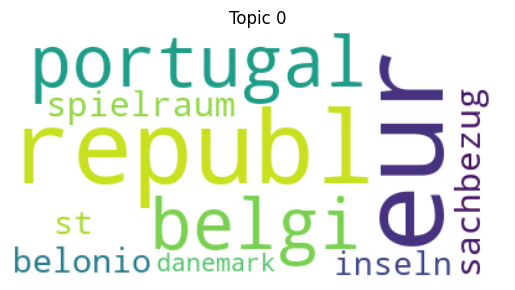

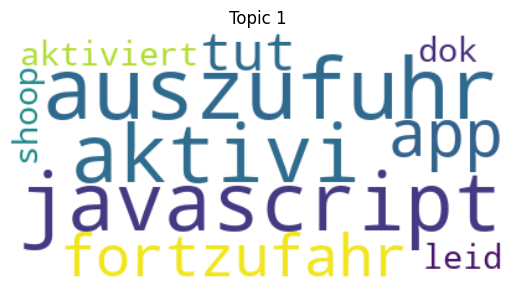

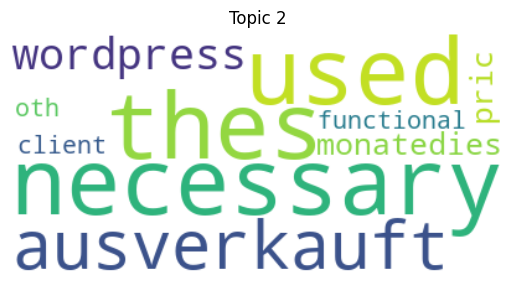

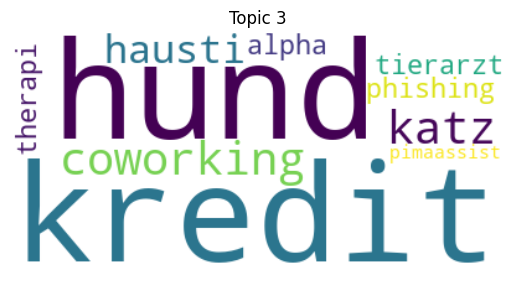

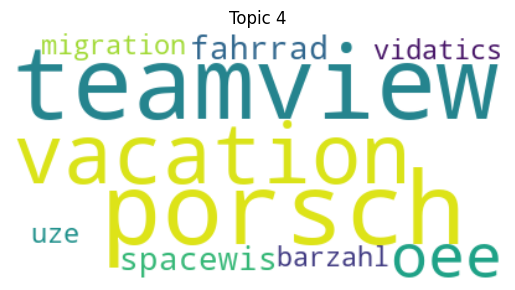

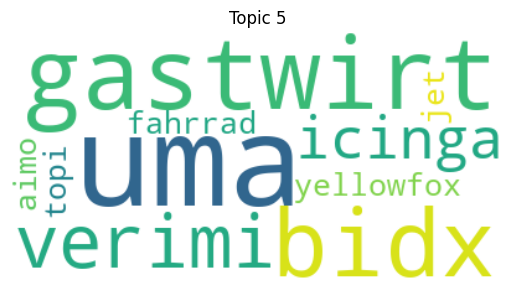

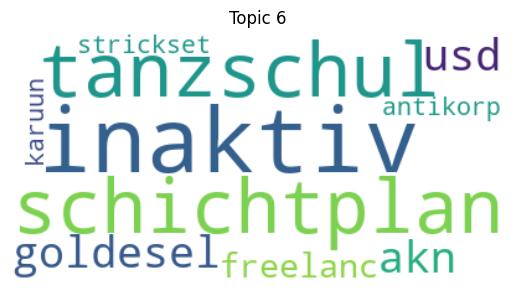

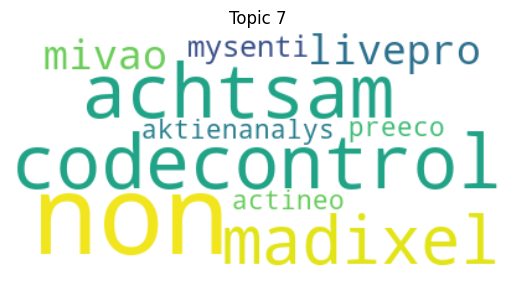

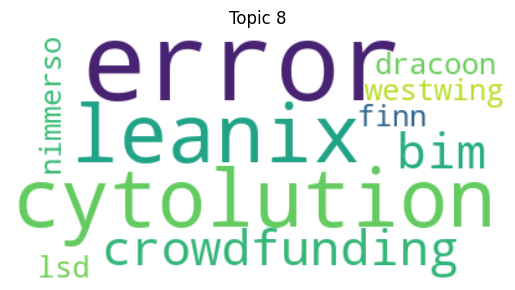

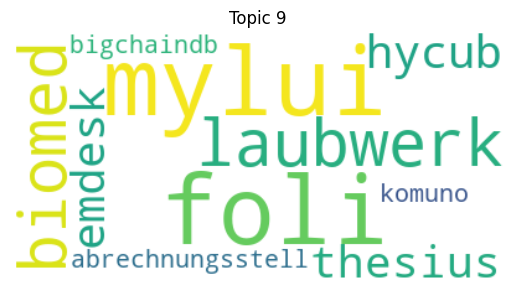

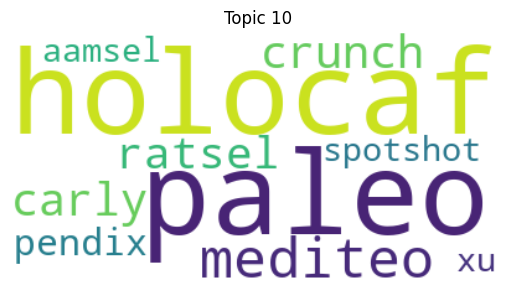

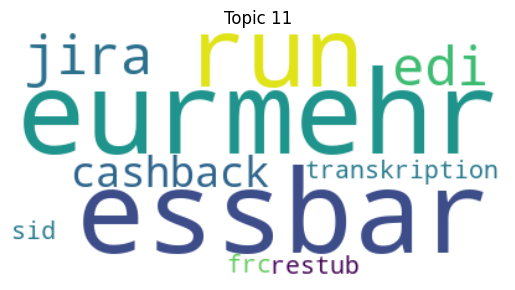

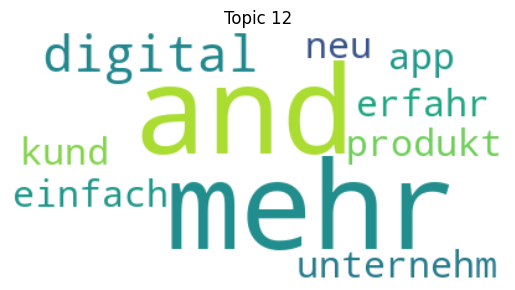

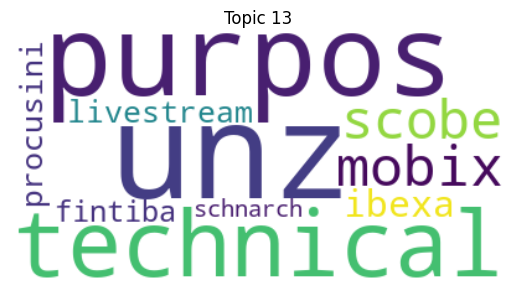

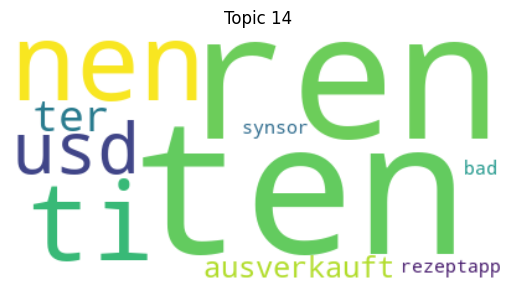

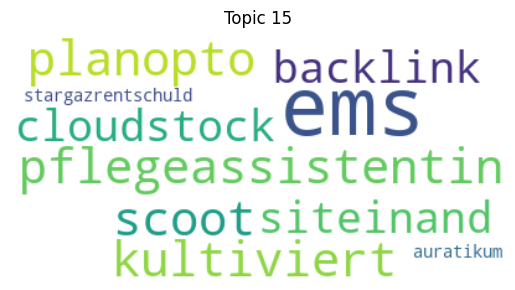

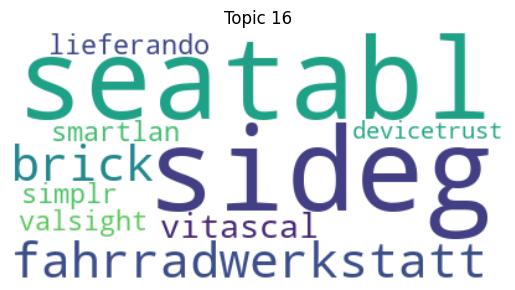

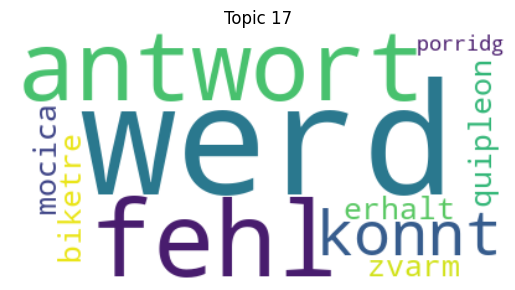

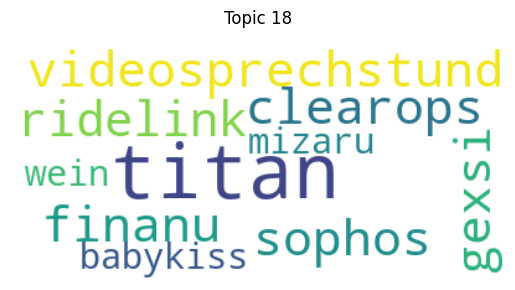

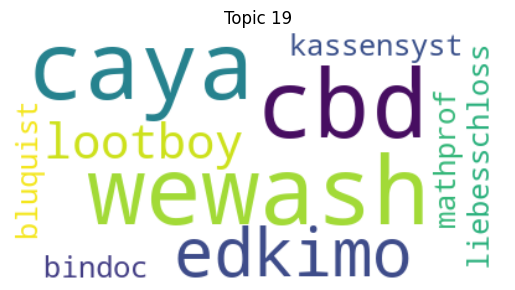

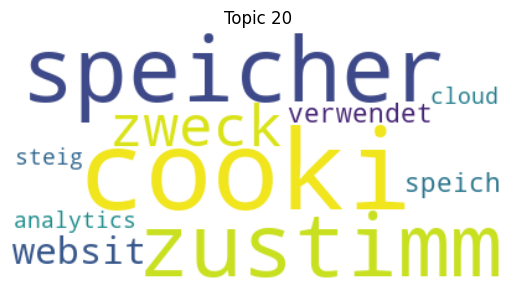

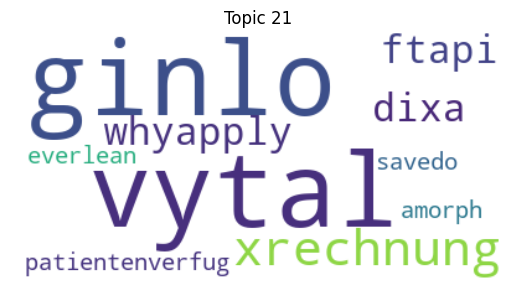

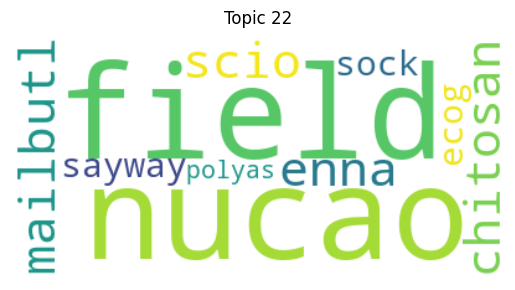

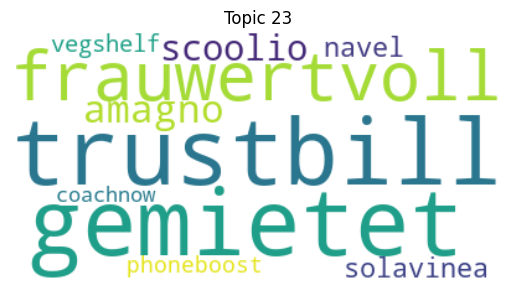

In [39]:
for topic_id, topic in enumerate(lda.components_):
    # Get the most significant words for the current topic
    topic_words = [count_vect.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]]
    word_freq = {word: 1.0 for word in topic_words}

    # Generate the word cloud for the current topic
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_freq)

    # Plot the word cloud
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Topic {}'.format(topic_id))
    plt.axis('off')
    plt.show()